In [1]:
#######################
#Michael Siebel
#Individual Project 1
#DATS 6103 (Sec 10)
######################

#Inital data cleaning section
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from inspect import signature

#Set Display (Remove Scientific Notation)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Read in Data
military = pd.read_csv('API_MS.MIL.XPND.GD.ZS_DS2_en_csv_v2.csv', sep=',', index_col=0, skiprows=4)
    #military = military.round({'Military expenditure (% of GDP)':2})
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', sep=',', index_col=0, skiprows=4)
population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv', sep=',', index_col=0, skiprows=4)

#Convert into Longitudinal dataset
df = military
df = df.append(gdp)
df = df.append(population)
df = df.drop(['Indicator Code','Country Code'], axis=1)

#Pivot three variables
df = pd.pivot_table(df,index=['Indicator Name','Country Name'])
df.columns= np.arange(1960,2017)

#Reshape to Cross-Sectional Panel Data
    #Military
military_data = df.loc['Military expenditure (% of GDP)'].T.reset_index()
military_data.rename(columns={'index':'Years'}, inplace=True)
military_rshp = pd.melt(military_data, id_vars=['Years'],var_name=['Country Name'])
military_rshp.rename(columns={'value':'Military Expenditure per GDP'}, inplace=True)
    #GDP
gdp_data = df.loc['GDP (current US$)'].T.reset_index()
gdp_data.rename(columns={'index':'Years'}, inplace=True)
gdp_rshp = pd.melt(gdp_data, id_vars=['Years'],var_name=['Country Name'])
gdp_rshp.rename(columns={'value':'GDP'}, inplace=True)
    #Population
pop_data = df.loc['Population, total'].T.reset_index()
pop_data.rename(columns={'index':'Years'}, inplace=True)
pop_rshp = pd.melt(pop_data, id_vars=['Years'],var_name=['Country Name'])
pop_rshp.rename(columns={'value':'Population'}, inplace=True)

#Merge Reshaped Data
df_rshp = military_rshp
df_rshp = df_rshp.merge(gdp_rshp)
df_rshp = df_rshp.merge(pop_rshp)
df_rshp = df_rshp.set_index(['Country Name','Years']).sort_index()

#Format Columns
df_rshp['Military Total Expenditure'] = (df_rshp['Military Expenditure per GDP']/100)*df_rshp['GDP']
df_rshp['Military Expenditure per Capita'] = (df_rshp['Military Total Expenditure']/df_rshp['Population'])
df_rshp['GDP'] = df_rshp.apply(lambda n: '{:.2f}'.format(n['GDP']), axis=1)
df_rshp['GDP'] = df_rshp['GDP'].astype(np.float64)
df_rshp['Population'] = df_rshp.apply(lambda n: '{:.0f}'.format(n['Population']), axis=1)
df_rshp['Population'] = df_rshp['Population'].astype(np.float64)
df_rshp['Military Total Expenditure'] = df_rshp.apply(lambda n: '{:.2f}'.format(n['Military Total Expenditure']), axis=1)
df_rshp['Military Total Expenditure'] = df_rshp['Military Total Expenditure'].astype(np.float64)
df_rshp[50:61]

Military Expenditure per GDP            GDP  Population  \
Country Name Years                                                            
Afghanistan  2010                           1.90 15936800636.25 28803167.00   
             2011                           1.78 17930239399.81 29708599.00   
             2012                           1.14 20536542736.73 30696958.00   
             2013                           1.05 20264253974.11 31731688.00   
             2014                           1.30 20616104297.67 32758020.00   
             2015                           0.99 19215562178.98 33736494.00   
             2016                           0.89 19469022207.64 34656032.00   
Albania      1960                            nan            nan  1608800.00   
             1961                            nan            nan  1659800.00   
             1962                            nan            nan  1711319.00   
             1963                            nan            nan  1762621.00   

                    Military Total Expenditure  \
Country Name Years                               
Afghanistan  2010                 302396449.47   
             2011                 318905914.33   
             2012                 235084908.44   
             2013                 212778504.08   
             2014                 267541047.58   
             2015                 190897729.21   
             2016                 173729131.95   
Albania      1960                          nan   
             1961                          nan   
             1962                          nan   
             1963                          nan   

                    Military Expenditure per Capita  
Country Name Years                                   
Afghanistan  2010                             10.50  
             2011                             10.73  
             2012                              7.66  
             2013                              6.71  
             2014                              8.17  
             2015                              5.66  
             2016                              5.01  
Albania      1960                               nan  
             1961                               nan  
             1962                               nan  
             1963                               nan

In [2]:
#Check if all variables are float64
df_rshp.dtypes

Military Expenditure per GDP       float64
GDP                                float64
Population                         float64
Military Total Expenditure         float64
Military Expenditure per Capita    float64
dtype: object

In [3]:
#Drop all none countries or other entities that are not non-sovereign territories
df_rshp = df_rshp.drop(['World', \
                        'High income', \
                        'OECD members', \
                        'Post-demographic dividend', \
                        'North America', \
                        'IDA & IBRD total', \
                        'Low & middle income', \
                        'Middle income', \
                        'IBRD only', \
                        'Europe & Central Asia', \
                        'Upper middle income', \
                        'Late-demographic dividend', \
                        'East Asia & Pacific', \
                        'European Union', \
                        'Early-demographic dividend', \
                        'Euro area', \
                        'East Asia & Pacific (excluding high income)', \
                        'East Asia & Pacific (IDA & IBRD countries)', \
                        'Middle East & North Africa', \
                        'Arab World', \
                        'Europe & Central Asia (IDA & IBRD countries)', \
                        'Europe & Central Asia (excluding high income)', \
                        'Lower middle income', \
                        'Latin America & Caribbean', \
                        'Latin America & the Caribbean (IDA & IBRD countries)', \
                        'Latin America & Caribbean (excluding high income)', \
                        'South Asia (IDA & IBRD)', \
                        'South Asia', \
                        'Middle East & North Africa (excluding high income)', \
                        'Middle East & North Africa (IDA & IBRD countries)', \
                        'Pacific island small states', \
                        'Not classified', \
                        'Heavily indebted poor countries (HIPC)', \
                        'Caribbean small states', \
                        'Small states', \
                        'Central Europe and the Baltics', \
                        'Other small states', \
                        'IDA only', \
                        'Sub-Saharan Africa (IDA & IBRD countries)', \
                        'Sub-Saharan Africa (excluding high income)', \
                        'IDA blend', \
                        'Fragile and conflict affected situations', \
                        'Pre-demographic dividend', \
                        'Low income', \
                        'Least developed countries: UN classification'])

In [4]:
#Missing data in 2016
df_rshp = df_rshp.reset_index()
df_rshp_2016 = df_rshp['Years'] == 2016
df_rshp_2016 = df_rshp[df_rshp_2016]
df_rshp = df_rshp.set_index(['Country Name','Years'])
df_rshp_2016 = df_rshp_2016.set_index(['Country Name','Years'])

#Check to see if there are any missing on 2016
print("The amount of missing data for year 2016 is: \n", df_rshp_2016.isnull().sum(axis=0))

The amount of missing data for year 2016 is: 
 Military Expenditure per GDP       77
GDP                                28
Population                          1
Military Total Expenditure         78
Military Expenditure per Capita    78
dtype: int64


In [5]:
#Missings from the mean of the last ten years (shows fewer missing data)
df_rshp = df_rshp.reset_index()
df_rshp_tenYears = df_rshp['Years'] > 2006
df_rshp_tenYears = df_rshp[df_rshp_tenYears]
df_rshp = df_rshp.set_index(['Country Name','Years'])
df_rshp_tenYears = df_rshp_tenYears.set_index(['Country Name','Years'])

#Check to see if there are any missing data for the past ten years
print("The amount of missing data for ten years is: \n", \
      df_rshp_tenYears.groupby('Country Name').mean().isnull().sum(axis=0))

The amount of missing data for ten years is: 
 Military Expenditure per GDP       57
GDP                                11
Population                          0
Military Total Expenditure         58
Military Expenditure per Capita    58
dtype: int64


In [6]:
#First look at the top ten
#The military spending of at least the top 10 nations (in military spending) 
milTotExp_10 = df_rshp_2016.sort_values(by='Military Total Expenditure', ascending=False).head(10)
milTotExp_10 = milTotExp_10.reset_index().drop(['Years','Military Expenditure per GDP','GDP','Population', \
                                          'Military Expenditure per Capita'],axis=1)
milTotExp_10

,Country Name,Military Total Expenditure
0,United States,611186443000.00
1,China,215355347872.82
2,Russian Federation,69267581227.01
3,Saudi Arabia,63672800000.00
4,India,56025539718.51
5,France,55758342172.26
6,United Kingdom,48286640377.87
7,Japan,46164777277.17
8,Germany,41076943640.67
9,"Korea, Rep.",36793126153.05


In [7]:
#Generate new variable
#Create military expenditure relative to total military expenditure by all top 10 countries
milTotExp_10 = milTotExp_10.drop('Country Name',axis=1)
totTopTen = milTotExp_10.sum()
df_rshp['Top Ten Proportion'] = (df_rshp['Military Total Expenditure']/totTopTen[0])*100
df_rshp_tenYears['Top Ten Proportion'] = (df_rshp_tenYears['Military Total Expenditure']/totTopTen[0])*100

In [8]:
#Table of Top Countries
#Create function 1: Table sorting the top countries
#View countries sorted by military total expenditure with total military spending per GDP,  
#                                                         percentage of military spending of the top ten, &
#                                                         total military spending per capita.
#Can show only country names sorted by any military total expenditure or the other three categories
#Can show only the amounts sorted by military total expenditure
#Can change the table row length from 10 to any other number (up to 219 countries/territories in dataset)

def milTotExp(year,gdp=False,relative=False,pop=False,amount=False,name=False):
        
    #Set data to year of input    
    df_rshp_t = df_rshp.reset_index()
    topTenExp = df_rshp_t['Years'] == year
    df_rshp_t = df_rshp_t[topTenExp]
    #Drop unneeded variables
    df_rshp_t = df_rshp_t.drop(['Years','GDP','Population'],axis=1)
    #Default is to sort by 2016 military total expenditure
    df_rshp_t = df_rshp_t.set_index(['Country Name'])
    df_rshp_t = df_rshp_t.loc[['United States', 'China', 'Russian Federation', 'Saudi Arabia', \
                               'India', 'France', 'United Kingdom', 'Japan', 'Germany', \
                               'Korea, Rep.']]   

    #Drop three of the four remaining variables if not specified
    if gdp == False:
        df_rshp_t = df_rshp_t.drop(['Military Expenditure per GDP'],axis=1)
    if relative == False:
        df_rshp_t = df_rshp_t.drop(['Top Ten Proportion'],axis=1)
    if pop == False:
        df_rshp_t = df_rshp_t.drop(['Military Expenditure per Capita'],axis=1)
    #If three alternative variables were not specified use default military total expediture
    if gdp==True or relative==True or pop==True:
        df_rshp_t = df_rshp_t.drop(['Military Total Expenditure'],axis=1)  	

    #If 'amount' is specified, remove country names and keep values sorted by military total expenditure
    if amount==True:
        df_rshp_t = df_rshp_t.reset_index(drop=True) 
        df_rshp_t.columns = [year]
        
    #If 'name' is specified, remove values and keep country names sorted by variable specified
    if name==True:
        df_rshp_t = df_rshp_t.reset_index() 
        varcol = df_rshp_t.iloc[:,1]
        df_rshp_t = df_rshp_t \
            .sort_values(by=varcol.name, ascending=False)
        df_rshp_t = df_rshp_t.reset_index()
        df_rshp_t = df_rshp_t.drop(df_rshp_t.iloc[:,[0,2]],axis=1)
        df_rshp_t.columns = [year]

    return df_rshp_t

In [9]:
#Testing function 1
#Using the function to show the top 10 countries (in military spending) 
milTotExp(2016)

,Military Total Expenditure
Country Name,
United States,611186443000.00
China,215355347872.82
Russian Federation,69267581227.01
Saudi Arabia,63672800000.00
India,56025539718.51
France,55758342172.26
United Kingdom,48286640377.87
Japan,46164777277.17
Germany,41076943640.67


In [10]:
#Table of Top Countries over Time
#Create function 2: Table showing positional change of categories using time range as columns
#View countries sorted by military total expenditure,
#                         total military spending per GDP,  
#                         percentage of military spending of the top ten, &
#                         total military spending per capita.
#Can show only country names sorted by any military total expenditure or the other three categories
#Can show only the amounts sorted by military total expenditure
#Can change the table row length from 10 to any other number (up to 219 countries/territories in dataset)

def milTotExp_cpr(start_year, end_year, gdp=False, relative=False, pop=False, amount=False):
    
    #If 'amount' is specified, remove country names and decide which variables to use using if statements
    if amount == True:
        if gdp == True:
            years = [milTotExp(year, gdp=True, amount=True) for year in range(start_year,end_year+1)]
        if relative == True:
            years = [milTotExp(year, relative=True, amount=True) for year in range(start_year,end_year+1)]
        if pop == True:
            years = [milTotExp(year, pop=True, amount=True) for year in range(start_year,end_year+1)]
        if gdp==False and relative==False and pop==False:
            years = [milTotExp(year, amount=True) for year in range(start_year,end_year+1)]  

        ctryName = pd.DataFrame({'Country Name': ['United States', 'China', 'Russian Federation', 'Saudi Arabia', \
                                                   'India', 'France', 'United Kingdom', 'Japan', 'Germany', \
                                                   'Korea, Rep.']})
        
        #Join each column created by year range loop into one table
        return ctryName.join(years[0:]).set_index(['Country Name'])

    #If 'amount' is not specified, remove values and decide which variables to use using if statements
    else:
        if gdp == True:
            years = [milTotExp(year, gdp=True, name=True) for year in range(start_year,end_year+1)]
        if relative == True:
            years = [milTotExp(year, relative=True, name=True) for year in range(start_year,end_year+1)]
        if pop == True:
            years = [milTotExp(year, pop=True, name=True) for year in range(start_year,end_year+1)]
        if gdp==False and relative==False and pop==False:
            years = [milTotExp(year, name=True) for year in range(start_year,end_year+1)]
    
        #Join each column created by year range loop into one table
        return years[0].join(years[1:])

In [11]:
#Testing Function 2
#Position Change: Compare the last 5 years of the top 10 countries (in military spending)
milTotExp_cpr(2012,2016)

,2012,2013,2014,2015,2016
0,United States,United States,United States,United States,United States
1,China,China,China,China,China
2,Russian Federation,Russian Federation,Russian Federation,Saudi Arabia,Russian Federation
3,France,Saudi Arabia,Saudi Arabia,Russian Federation,Saudi Arabia
4,Japan,France,France,France,India
5,United Kingdom,United Kingdom,United Kingdom,United Kingdom,France
6,Saudi Arabia,Japan,India,India,United Kingdom
7,Germany,Germany,Japan,Japan,Japan
8,India,India,Germany,Germany,Germany
9,"Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep."


In [12]:
#Line Graph of Top Countries
#Create function 3: Line graph showing country of input by one of 4 categories using 2 potential time ranges
#View countries by military total expenditure,
#                  total military spending per GDP,  
#                  percentage of military spending of the top ten, &
#                  total military spending per capita.
#Can range from 1960 to 2016 or 2007 to 2016
#Can define color of line

def plotCtry(country,gdp=False,relative=False,pop=False,tenYears=False,color=None,linewidth=None):
    
    #Drop variables that will not be used
    #Use two possible datasets (one with range from 1960 and one with range from 2007)
    dfTenYears = df_rshp_tenYears.drop(['GDP','Population'],axis=1)
    dfFullYears = df_rshp.drop(['GDP','Population'],axis=1)
    
    #Drop three of the four remaining variables if not specified
    if gdp == False:
        dfTenYears = dfTenYears.drop(['Military Expenditure per GDP'],axis=1)
        dfFullYears = dfFullYears.drop(['Military Expenditure per GDP'],axis=1)
    if relative == False:
        dfTenYears = dfTenYears.drop(['Top Ten Proportion'],axis=1)
        dfFullYears = dfFullYears.drop(['Top Ten Proportion'],axis=1)
    if pop == False:
        dfTenYears = dfTenYears.drop(['Military Expenditure per Capita'],axis=1)
        dfFullYears = dfFullYears.drop(['Military Expenditure per Capita'],axis=1)
    #If three alternative variables were not specified use default military total expediture
    if gdp==True or relative==True or pop==True:
        dfTenYears = dfTenYears.drop(['Military Total Expenditure'],axis=1)
        dfFullYears = dfFullYears.drop(['Military Total Expenditure'],axis=1)       
    
    #Determine with dataset to use and plot
    if tenYears == True:
        data = dfTenYears.loc[country]
        plt.plot(data.index, data.values, color=color, linewidth=linewidth)
    else:
        data = dfFullYears.loc[country]
        plt.plot(data.index, data.values, color=color, linewidth=linewidth)

In [13]:
#Save the top ten countries for graphs later
milTotExp_10_ctryNames = milTotExp(2016,name=True).iloc[:,0]
milTotExp_10_ctryNames

0         United States
1                 China
2    Russian Federation
3          Saudi Arabia
4                 India
5                France
6        United Kingdom
7                 Japan
8               Germany
9           Korea, Rep.
Name: 2016, dtype: object

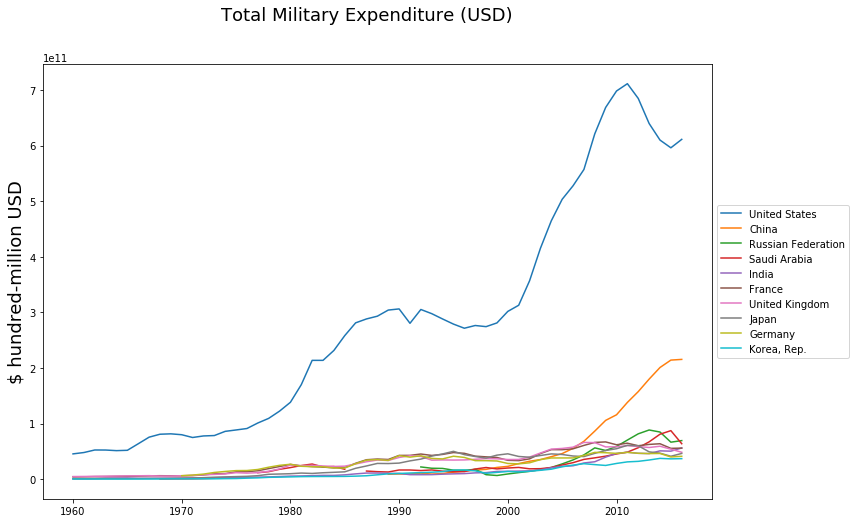

In [14]:
#Testing function 3
#Graph the top ten Countries in Total Military Expenditure
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country)
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Total Military Expenditure (USD)", fontsize=18)
plt.ylabel("$ hundred-million USD", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

In [15]:
#Define the remaining countries
otherCountries = list(set(df_rshp.reset_index().iloc[:,0]) - set(milTotExp_10_ctryNames))
print("The number of countries outside the top ten is", len(otherCountries))

The number of countries outside the top ten is 209


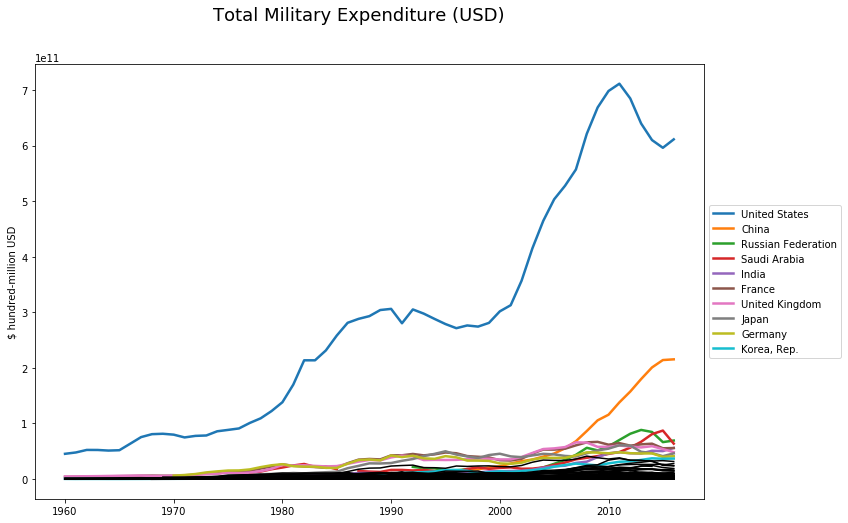

In [16]:
#Graph the top ten Countries in Total Military Expenditure
#Compare the top ten to other countries
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,linewidth=2.5)

for country in otherCountries:
    plotCtry(country,color="black")
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.suptitle("Total Military Expenditure (USD)", fontsize=18)
plt.ylabel("$ hundred-million USD")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

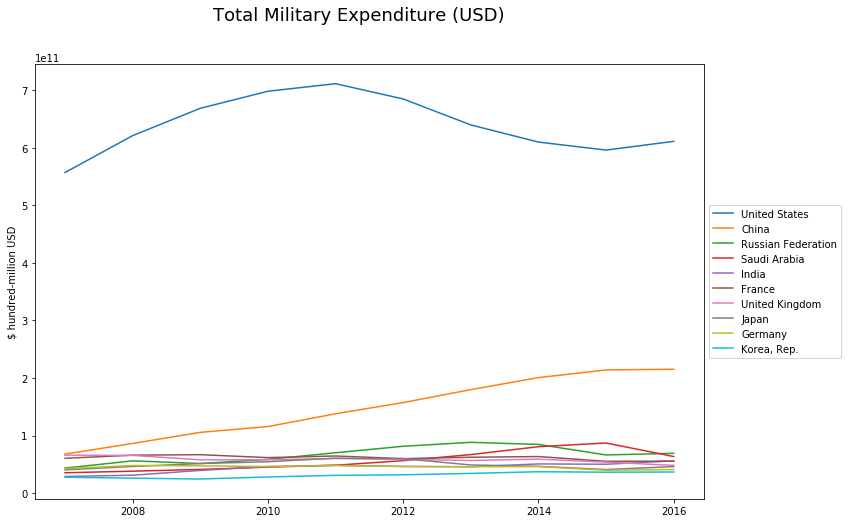

In [17]:
#Graph the top ten Countries in Total Military Expenditure
#Over the past 10 years only
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,tenYears=True)
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Total Military Expenditure (USD)", fontsize=18)
plt.ylabel("$ hundred-million USD")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

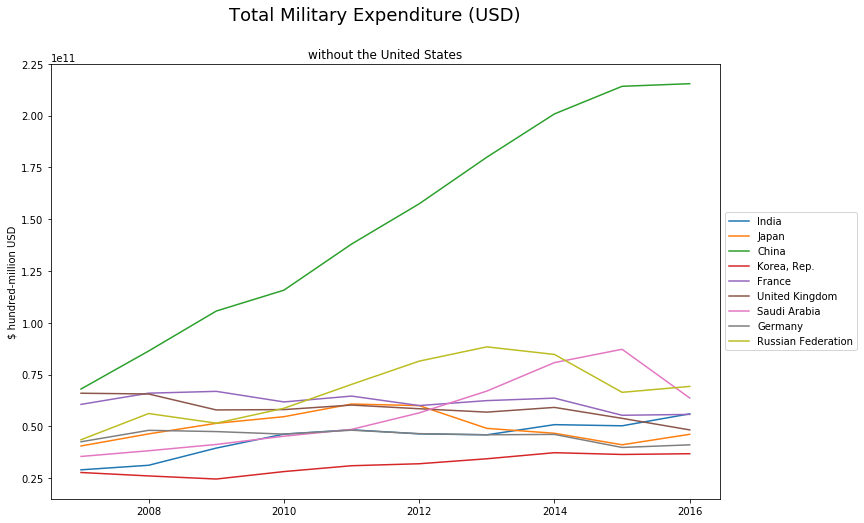

In [18]:
#Graph the top ten Countries in Total Military Expenditure 
#Over the past 10 years only
#Remove the United States
plt.figure(figsize=(12,8))

milTotExp_9_ctryNames = list(set(milTotExp_10_ctryNames) - set(['United States']))
for country in milTotExp_9_ctryNames:
    plotCtry(country,tenYears=True)
    
plt.legend(milTotExp_9_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Total Military Expenditure (USD)", fontsize=18)
plt.title("without the United States")
plt.ylabel("$ hundred-million USD")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

In [19]:
#Compare the data to that country’s GDP
milTotExp(2016,gdp=True)

,Military Expenditure per GDP
Country Name,
United States,3.28
China,1.92
Russian Federation,5.40
Saudi Arabia,9.85
India,2.47
France,2.26
United Kingdom,1.82
Japan,0.93
Germany,1.18


In [20]:
#Compare the data to that country’s GDP (Positional Change)
#Over the past 5 years
milTotExp_cpr(2012,2016,gdp=True)

,2012,2013,2014,2015,2016
0,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
1,United States,Russian Federation,Russian Federation,Russian Federation,Russian Federation
2,Russian Federation,United States,United States,United States,United States
3,"Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep."
4,India,India,India,India,India
5,France,France,France,France,France
6,United Kingdom,United Kingdom,United Kingdom,China,China
7,China,China,China,United Kingdom,United Kingdom
8,Germany,Germany,Germany,Germany,Germany
9,Japan,Japan,Japan,Japan,Japan


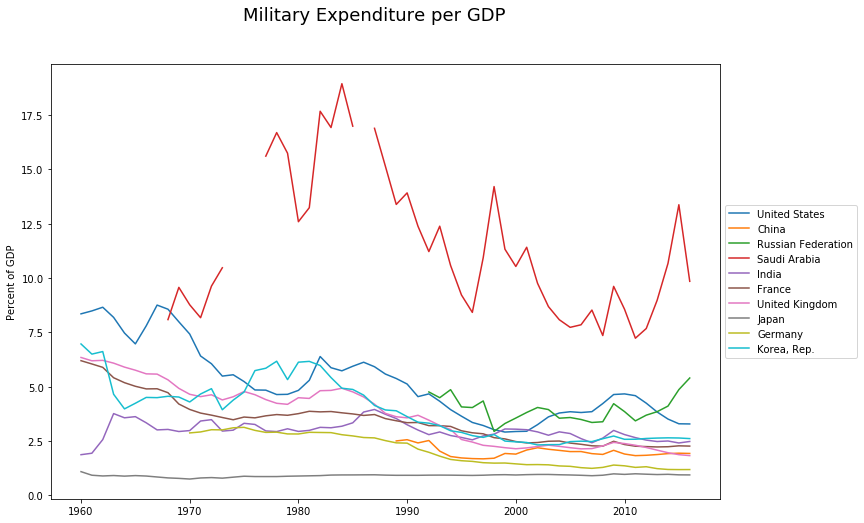

In [21]:
#Compare the data to that country’s GDP
#Since 1960
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,gdp=True)  
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Military Expenditure per GDP", fontsize=18)
plt.ylabel("Percent of GDP")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

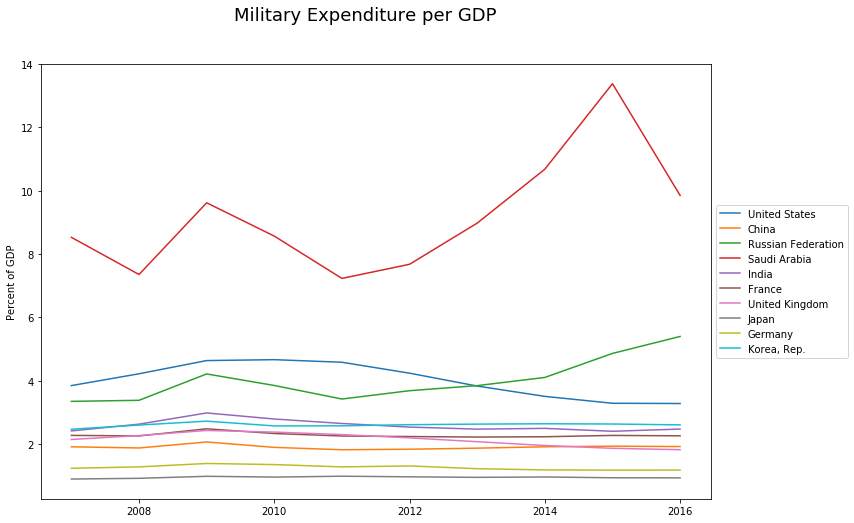

In [22]:
#Compare the data to that country’s GDP
#Over the past 10 years
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,gdp=True,tenYears=True)   
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Military Expenditure per GDP", fontsize=18)
plt.ylabel("Percent of GDP")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

In [23]:
#Compare the data to the overall military spending of the all 10+ countries
milTotExp(2016,relative=True)

,Top Ten Proportion
Country Name,
United States,49.15
China,17.32
Russian Federation,5.57
Saudi Arabia,5.12
India,4.51
France,4.48
United Kingdom,3.88
Japan,3.71
Germany,3.30


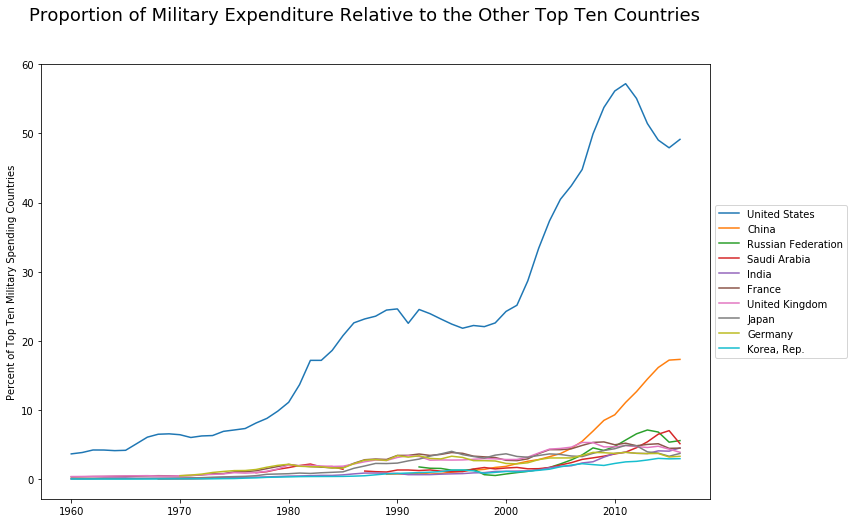

In [24]:
#Compare the data to the overall military spending of the all 10+ countries
#Since 1960
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,relative=True)  
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Proportion of Military Expenditure Relative to the Other Top Ten Countries", fontsize=18)
plt.ylabel("Percent of Top Ten Military Spending Countries")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

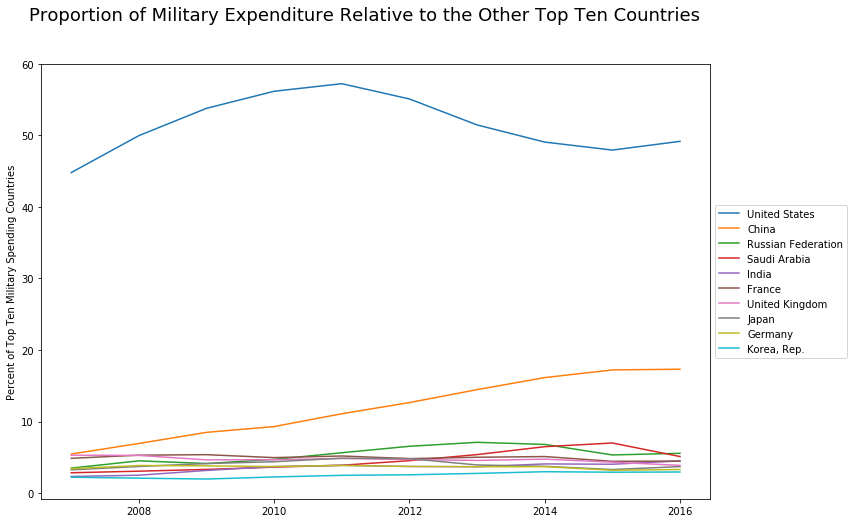

In [25]:
#Compare the data to the overall military spending of the all 10+ countries
#Over the past 10 years
plt.figure(figsize=(12,8))

for country in milTotExp_10_ctryNames:
    plotCtry(country,relative=True,tenYears=True)
    
plt.legend(milTotExp_10_ctryNames, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Proportion of Military Expenditure Relative to the Other Top Ten Countries", fontsize=18)
plt.ylabel("Percent of Top Ten Military Spending Countries")
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.show()

In [26]:
#Compare the per person military spending to the per person GDP
milTotExp(2016,gdp=True,pop=True)

,Military Expenditure per GDP,Military Expenditure per Capita
Country Name,,
United States,3.28,1891.47
China,1.92,156.21
Russian Federation,5.40,479.88
Saudi Arabia,9.85,1972.78
India,2.47,42.31
France,2.26,833.51
United Kingdom,1.82,735.66
Japan,0.93,363.52
Germany,1.18,496.89


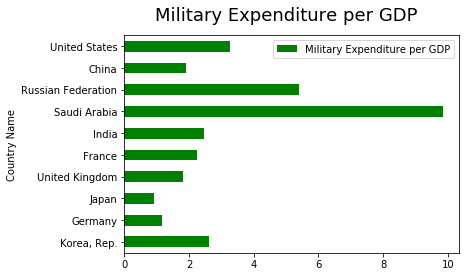

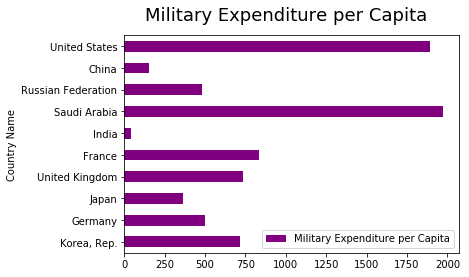

In [27]:
#Compare the per person military spending to the per GDP
#Horizontal Bar Chart
plt.figure(figsize=(12,12))
milTotExp(2016,gdp=True).plot.barh(stacked=True, color='green').invert_yaxis()
plt.suptitle("Military Expenditure per GDP", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')

milTotExp(2016,pop=True).plot.barh(stacked=True, color='purple').invert_yaxis()
plt.suptitle("Military Expenditure per Capita", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')

plt.show()

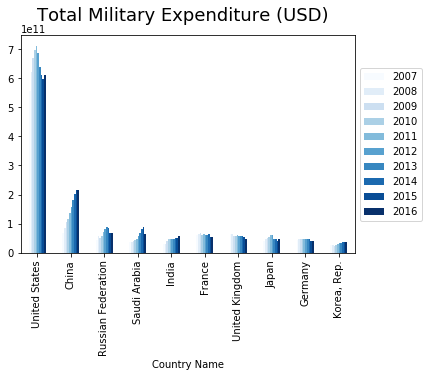

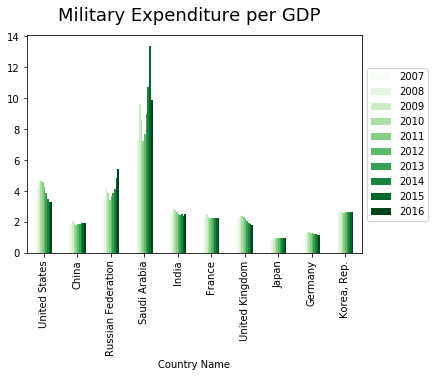

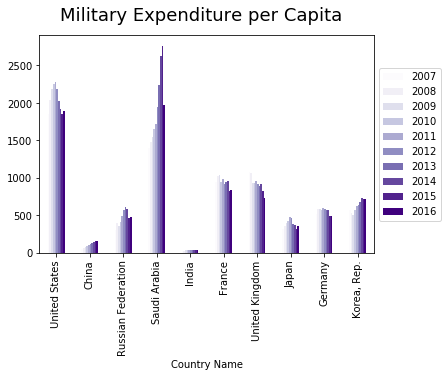

In [28]:
#Single out the fastest growing countries in military spending in fixed value and in percentage
plt.figure(figsize=(12,12))

milTotExp_cpr(2007, 2016, amount=True) \
    .applymap(abs).plot(kind='bar',colormap='Blues')
plt.legend(np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Total Military Expenditure (USD)", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')

milTotExp_cpr(2007, 2016, gdp=True, amount=True) \
    .applymap(abs).plot(kind='bar',colormap='Greens')
plt.legend(np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Military Expenditure per GDP", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')

milTotExp_cpr(2007, 2016, pop=True, amount=True) \
    .applymap(abs).plot(kind='bar',colormap='Purples')
plt.legend(np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle("Military Expenditure per Capita", fontsize=18)
plt.tick_params(axis='y')
plt.tick_params(axis='x')

plt.show()

In [29]:
milTotExp_cpr(2007,2016,amount=True)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
United States,556961000000.00,621131000000.00,668567000000.00,698180000000.00,711338000000.00,684780000000.00,639704000000.00,609914000000.00,596009639000.00,611186443000.00
China,68011830430.50,86361477686.47,105644523816.49,115711268333.75,137966450206.08,157391125263.37,179879290052.01,200773184268.75,214092680538.70,215355347872.82
Russian Federation,43534994996.25,56183785393.25,51532116797.52,58720227608.76,70237523951.49,81469399931.26,88352896463.56,84696520420.45,66418653805.44,69267581227.01
Saudi Arabia,35469513008.67,38222933333.33,41267200000.00,45244533333.33,48530933333.33,56497866666.67,67020000000.00,80762400000.00,87185866666.67,63672800000.00
India,29018186469.68,31216843212.97,39506984067.43,46255942425.96,48338115459.66,46373492669.42,45911657319.85,50819097583.39,50263944110.53,56025539718.51
France,60598138516.29,66007030906.69,66888024451.24,61781752036.17,64600904444.42,60035184556.55,62417084107.90,63613566044.58,55344650386.62,55758342172.26
United Kingdom,65982392957.18,65615349264.71,57916342109.36,58082817781.31,60270451548.60,58495657750.21,56861797135.76,59141019970.71,53862185493.29,48286640377.87
Japan,40530217785.46,46361244007.57,51465158207.59,54655466301.36,60762198741.37,60011563726.20,49023953364.70,46656616321.78,41103226465.62,46164777277.17
Germany,42554065151.93,48079683609.20,47472909141.43,46255524135.30,48140330978.68,46470894703.93,45930529473.40,46102670764.54,39814388285.63,41076943640.67


In [30]:
milTotExp_cpr(2007,2016,gdp=True,amount=True)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
United States,3.85,4.22,4.64,4.67,4.58,4.24,3.83,3.51,3.29,3.28
China,1.91,1.88,2.07,1.90,1.82,1.84,1.87,1.92,1.93,1.92
Russian Federation,3.35,3.38,4.21,3.85,3.42,3.69,3.85,4.10,4.86,5.40
Saudi Arabia,8.53,7.35,9.62,8.57,7.23,7.68,8.98,10.68,13.38,9.85
India,2.42,2.63,2.98,2.79,2.65,2.54,2.47,2.50,2.41,2.47
France,2.28,2.26,2.48,2.33,2.26,2.24,2.22,2.23,2.27,2.26
United Kingdom,2.15,2.27,2.43,2.38,2.30,2.20,2.08,1.96,1.87,1.82
Japan,0.90,0.92,0.98,0.96,0.99,0.97,0.95,0.96,0.94,0.93
Germany,1.24,1.28,1.39,1.35,1.28,1.31,1.22,1.18,1.18,1.18


In [31]:
milTotExp_cpr(2007,2016,pop=True,amount=True)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,
United States,1848.95,2042.56,2179.36,2256.94,2282.39,2180.84,2023.07,1914.58,1857.33,1891.47
China,51.61,65.20,79.36,86.50,102.64,116.53,132.52,147.17,156.13,156.21
Russian Federation,304.86,393.60,360.91,411.06,491.31,568.91,615.67,588.91,460.93,479.88
Saudi Arabia,1404.59,1473.47,1547.82,1649.71,1718.64,1942.42,2238.14,2624.14,2762.79,1972.78
India,24.60,26.08,32.54,37.58,38.76,36.72,35.91,39.28,38.40,42.31
France,946.61,1025.35,1033.71,950.09,988.65,914.34,945.73,959.02,830.70,833.51
United Kingdom,1075.99,1061.62,929.99,925.38,952.76,918.29,886.69,915.31,827.01,735.66
Japan,316.64,362.02,401.92,426.76,475.32,470.20,384.67,366.58,323.29,363.52
Germany,517.27,585.55,579.63,565.63,599.69,577.81,569.54,569.29,487.40,496.89
